# SPARKS FOUNDATION

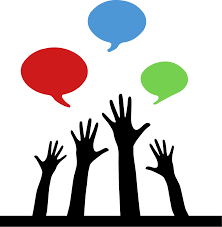



## Data Science And Business Analytics
## Task 6 - Prediction Using Decision Tree Algorithm

### Author - Mridul Katoch


## Importing Libraries 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Importing Dataset

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
# Features of our dataset
iris.feature_names 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# Data of our dataset 
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
# Converting the arrays into pandas dataframe
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Loading our target column in our pandas dataframe 
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# classes name 
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
classes_name = ['setosa','versicolor','virginica']

In [11]:
df['iris_name']=df['target'].apply(lambda x:classes_name[x])

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,iris_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
iris_name            0
dtype: int64

## EDA

### NOTE: 
### 1)Indexes from 0-49 are examples of setosa
### 2)Indexes from 50-99 are examples of versicolor
### 3)Indexes from 100-149 are examples of virginica

In [89]:
df_setosa = df[:50]
df_versicolor = df[50:100]
df_virginica = df[100:150]

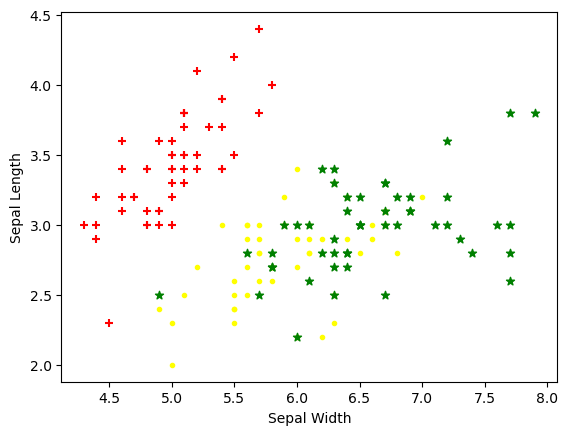

In [17]:
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.scatter(df_setosa['sepal length (cm)'],df_setosa['sepal width (cm)'],
            color='red',marker='+')
plt.scatter(df_versicolor['sepal length (cm)'],df_versicolor['sepal width (cm)'],
            color='yellow',marker='.')
plt.scatter(df_virginica['sepal length (cm)'],df_virginica['sepal width (cm)'],
            color='green',marker='*')


### From above graph we can conclude that there is clear separation between 
### setosa and the two species(versicolor,virginica)

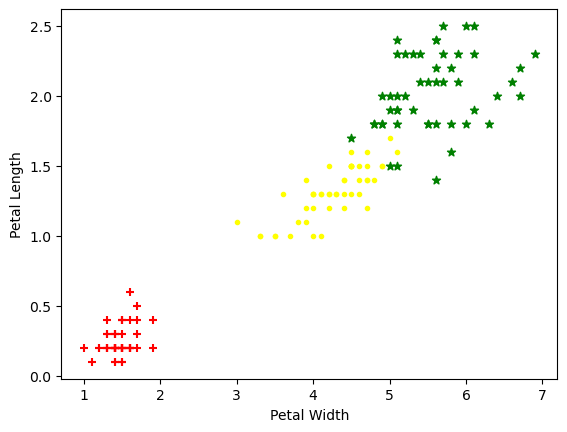

In [19]:
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.scatter(df_setosa['petal length (cm)'],df_setosa['petal width (cm)'],
            color='red',marker='+')
plt.scatter(df_versicolor['petal length (cm)'],df_versicolor['petal width (cm)'],
            color='yellow',marker='.')
plt.scatter(df_virginica['petal length (cm)'],df_virginica['petal width (cm)'],
            color='green',marker='*')


### From above graph we can conclude that there is clear separation between setosa and the two species(versicolor,virginica)
### and
### versicolor and virginica are not so mixed up as the case when we compared there sepal length and width 

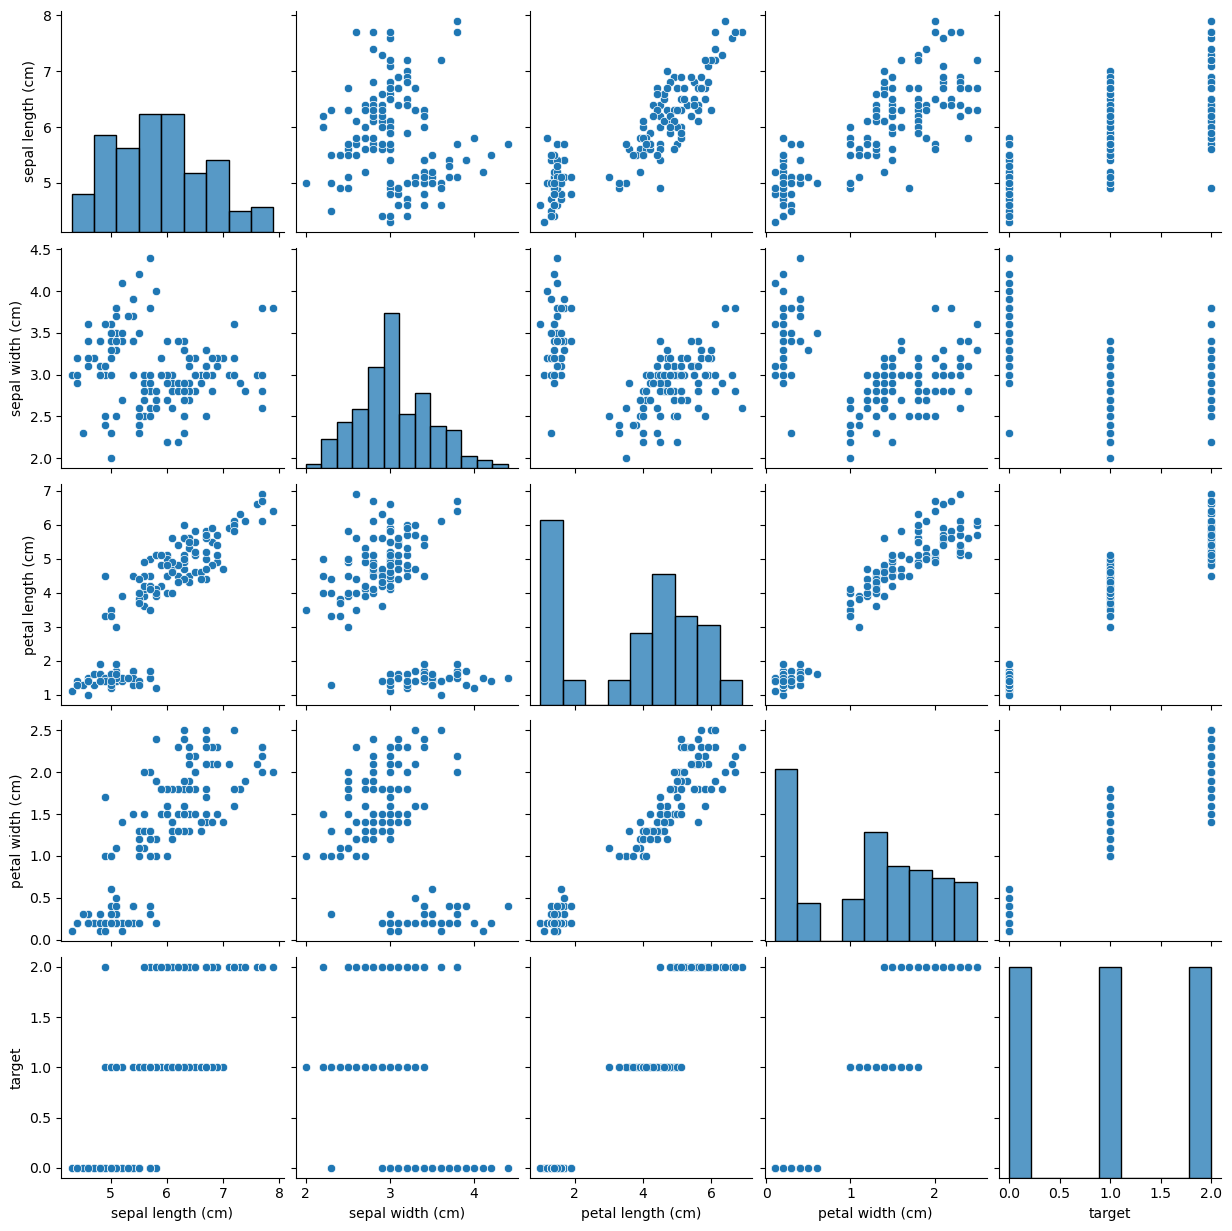

In [21]:
sns.pairplot(df)

In [22]:
df.corr().target


sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
target               1.000000
Name: target, dtype: float64

### Correlation between the target and different columns Petal Width has the highest corr with the target column

<AxesSubplot:>

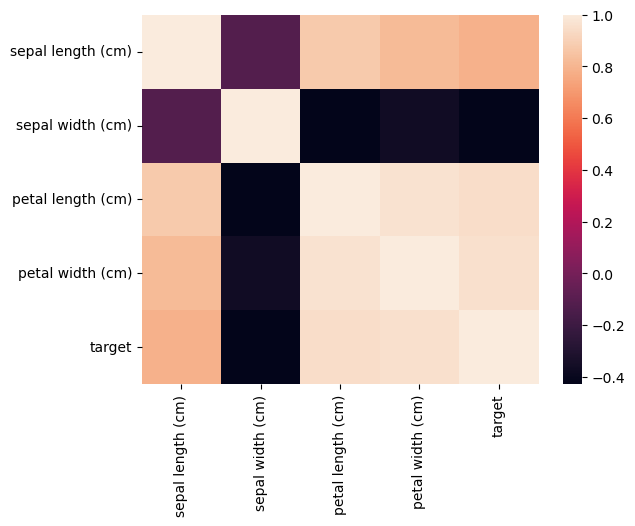

In [23]:
sns.heatmap(df.corr())

## Train Test Split

In [25]:
X=df.drop(['target','iris_name'],axis=1)

In [26]:
y=df['target']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

## Normalizing the values

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training Decision Tree Model

In [32]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [33]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

In [35]:
predictions = dtree.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        16
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [38]:
print(confusion_matrix(y_test,predictions))

[[17  0  0]
 [ 0 15  1]
 [ 0  1 11]]


In [39]:
dtree.score(X_test,y_test)

0.9555555555555556

## Visualization

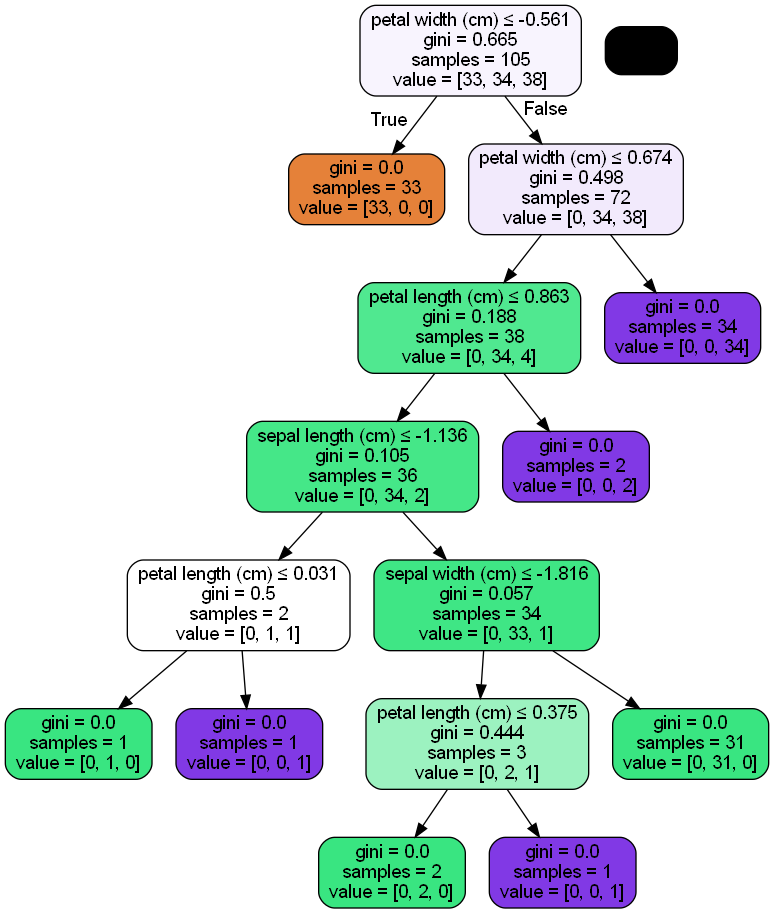

In [40]:
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Training the Random Forest Model

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier(n_estimators=10)

In [44]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

## Prediction and Evaluation

In [46]:
predictions = rfc.predict(X_test)

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        16
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [48]:
print(confusion_matrix(y_test,predictions))

[[17  0  0]
 [ 0 15  1]
 [ 0  1 11]]


In [49]:
rfc.score(X_test,y_test)

0.9555555555555556

## What if instead of providing all the features, we provide information about either sepal or petal of the iris flower?

## Train Test Split

In [52]:
X1 = df[['sepal length (cm)','sepal width (cm)']]
X2 = df[['petal length (cm)','petal width (cm)']]

## Considering Sepal only

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=25)

## Training Decision Tree Model

In [56]:
dtree2 = DecisionTreeClassifier()
dtree2.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

In [58]:
predictions = dtree2.predict(X_test)

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.67      0.62      0.65        16
           2       0.53      0.67      0.59        12

    accuracy                           0.73        45
   macro avg       0.73      0.72      0.73        45
weighted avg       0.76      0.73      0.74        45



In [60]:
print(confusion_matrix(y_test,predictions))

[[15  1  1]
 [ 0 10  6]
 [ 0  4  8]]


In [61]:
dtree2.score(X_test,y_test)

0.7333333333333333

## Visualization

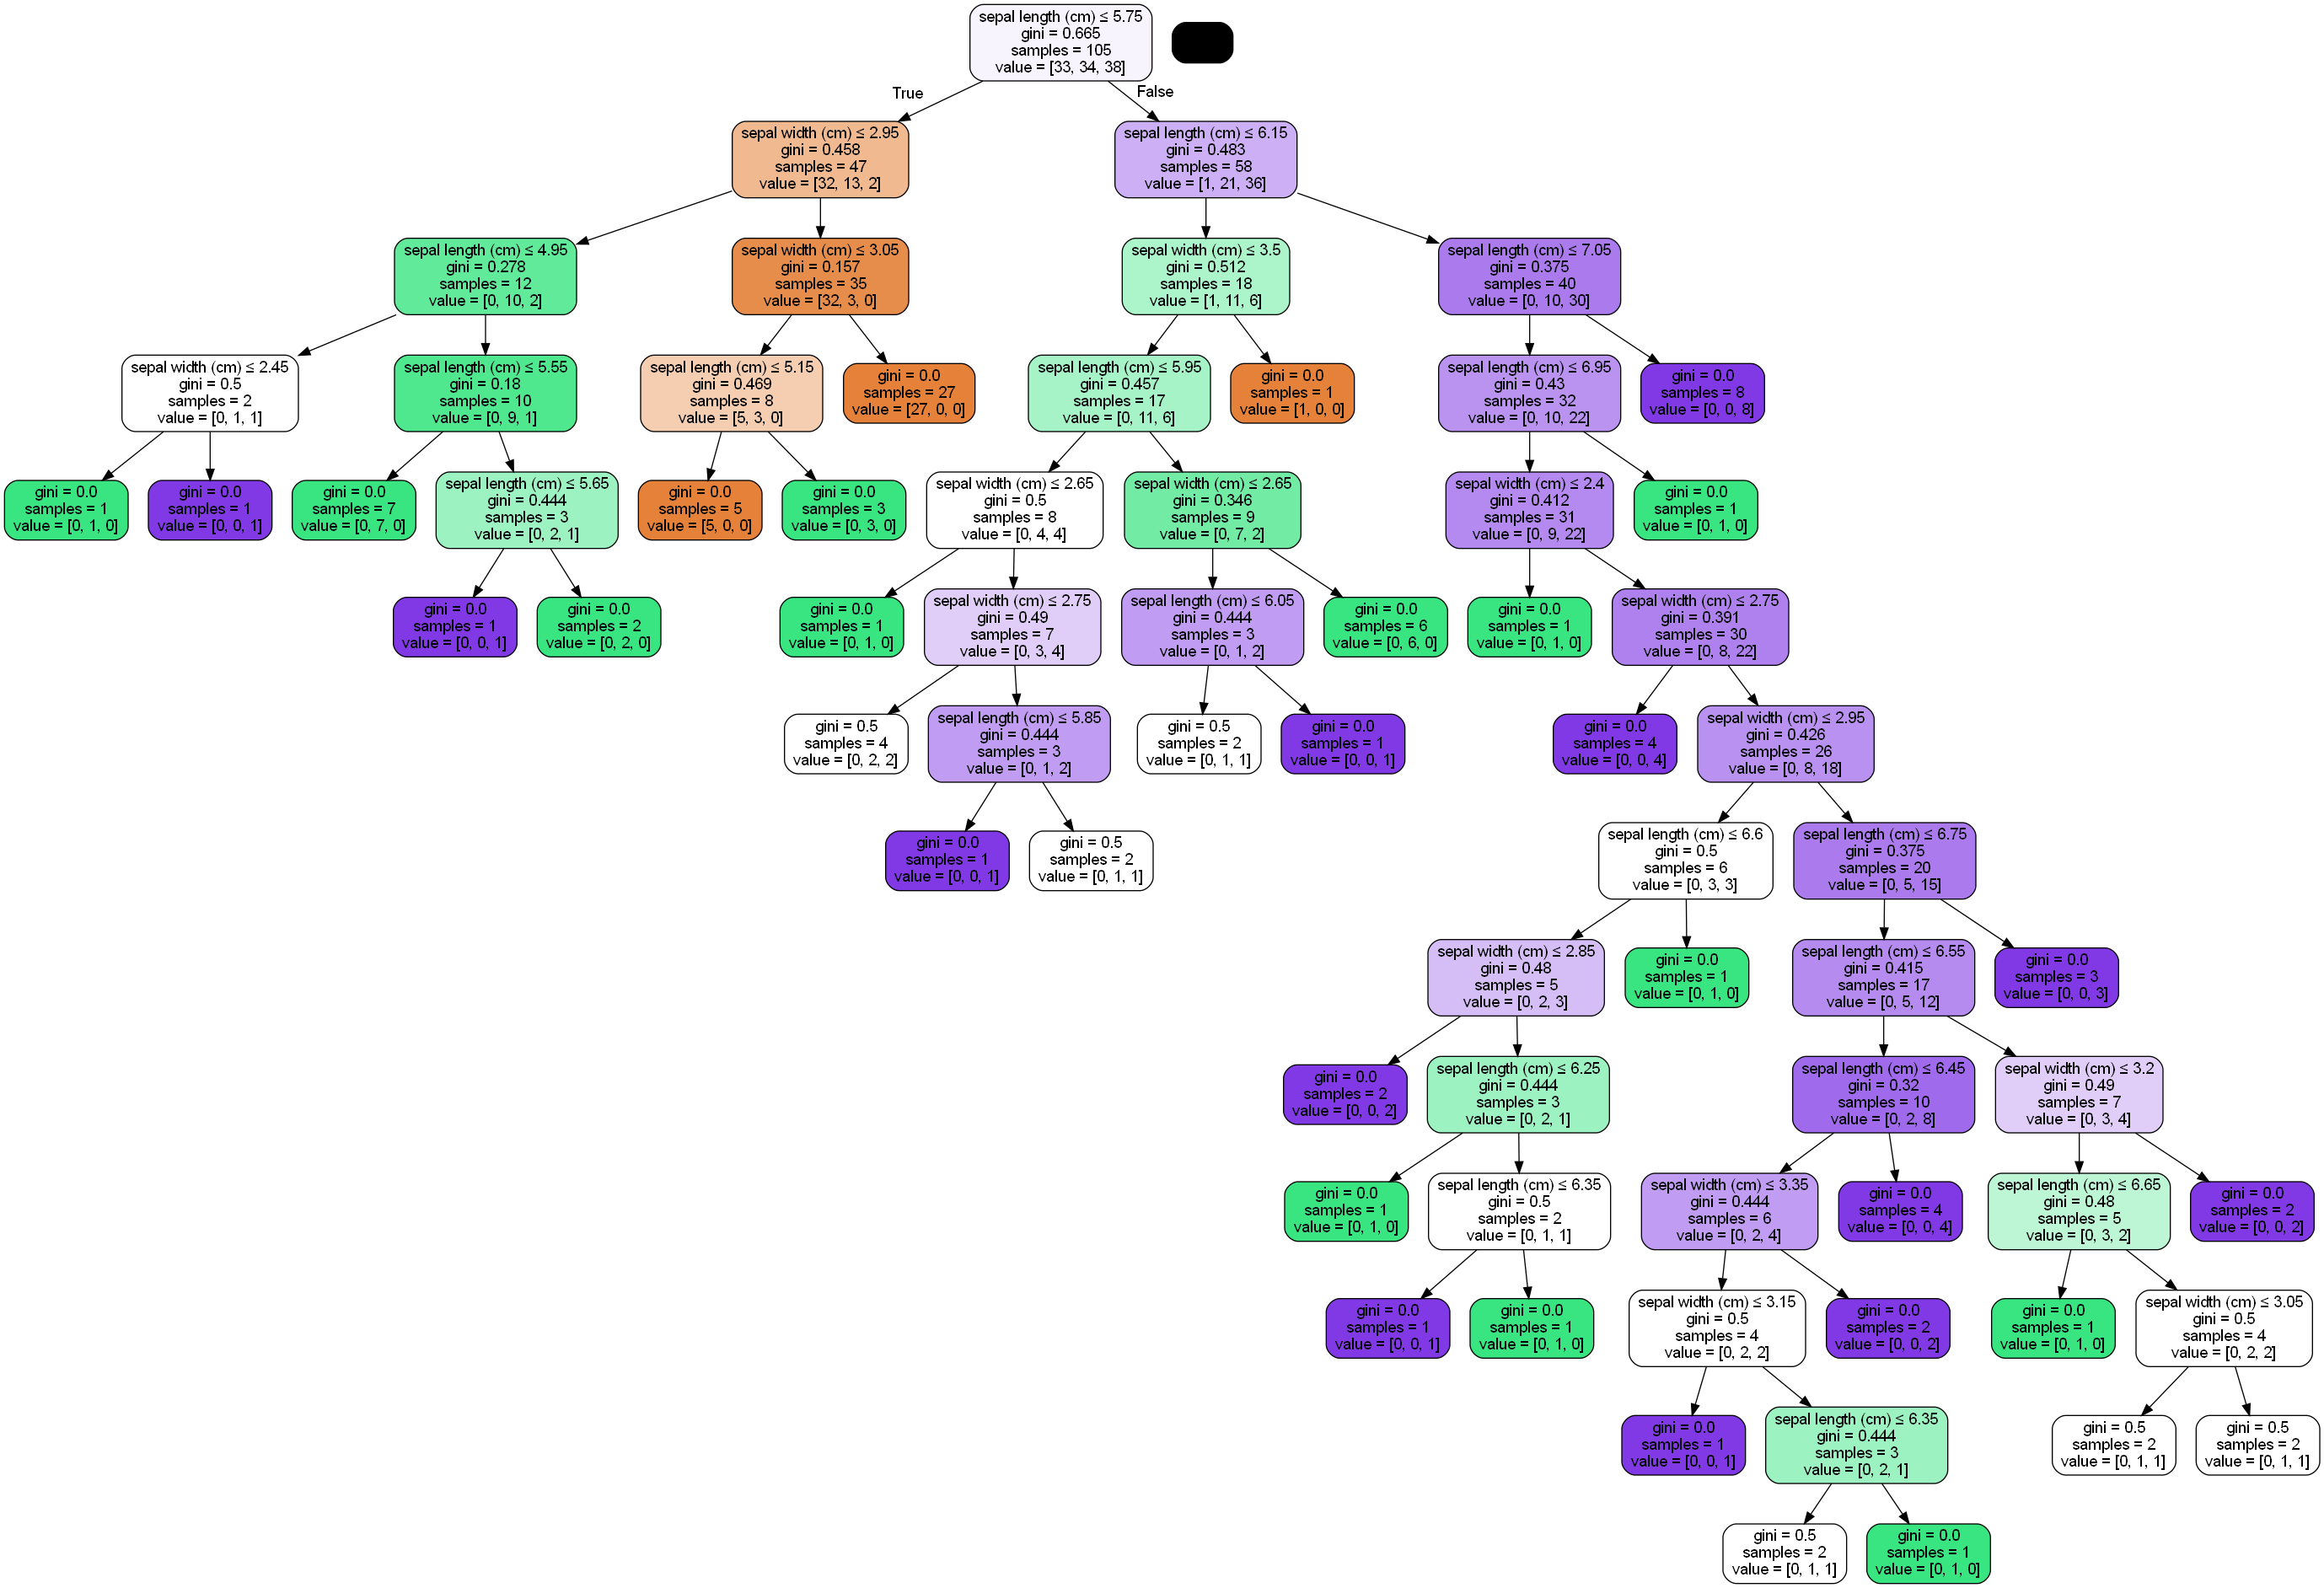

In [62]:
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree2, out_file=dot_data, feature_names=['sepal length (cm)',
 'sepal width (cm)'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Training the Random Forest Model

In [64]:
rfc2 = RandomForestClassifier(n_estimators=10)

In [65]:
rfc2.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

## Prediction and Evaluation

In [67]:
predictions = rfc2.predict(X_test)

In [68]:


print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.62      0.62      0.62        16
           2       0.54      0.58      0.56        12

    accuracy                           0.73        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.74      0.73      0.74        45



In [69]:
rfc2.score(X_test,y_test)

0.7333333333333333

In [70]:
print(confusion_matrix(y_test,predictions))

[[16  1  0]
 [ 0 10  6]
 [ 0  5  7]]


## Considering Petals only

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=25)

## Training Decision Tree Model

In [74]:
dtree3 = DecisionTreeClassifier()
dtree3.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

In [76]:
predictions = dtree3.predict(X_test)

In [77]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        16
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [78]:
print(confusion_matrix(y_test,predictions))

[[17  0  0]
 [ 0 15  1]
 [ 0  1 11]]


In [79]:
dtree3.score(X_test,y_test)

0.9555555555555556

## Visualization

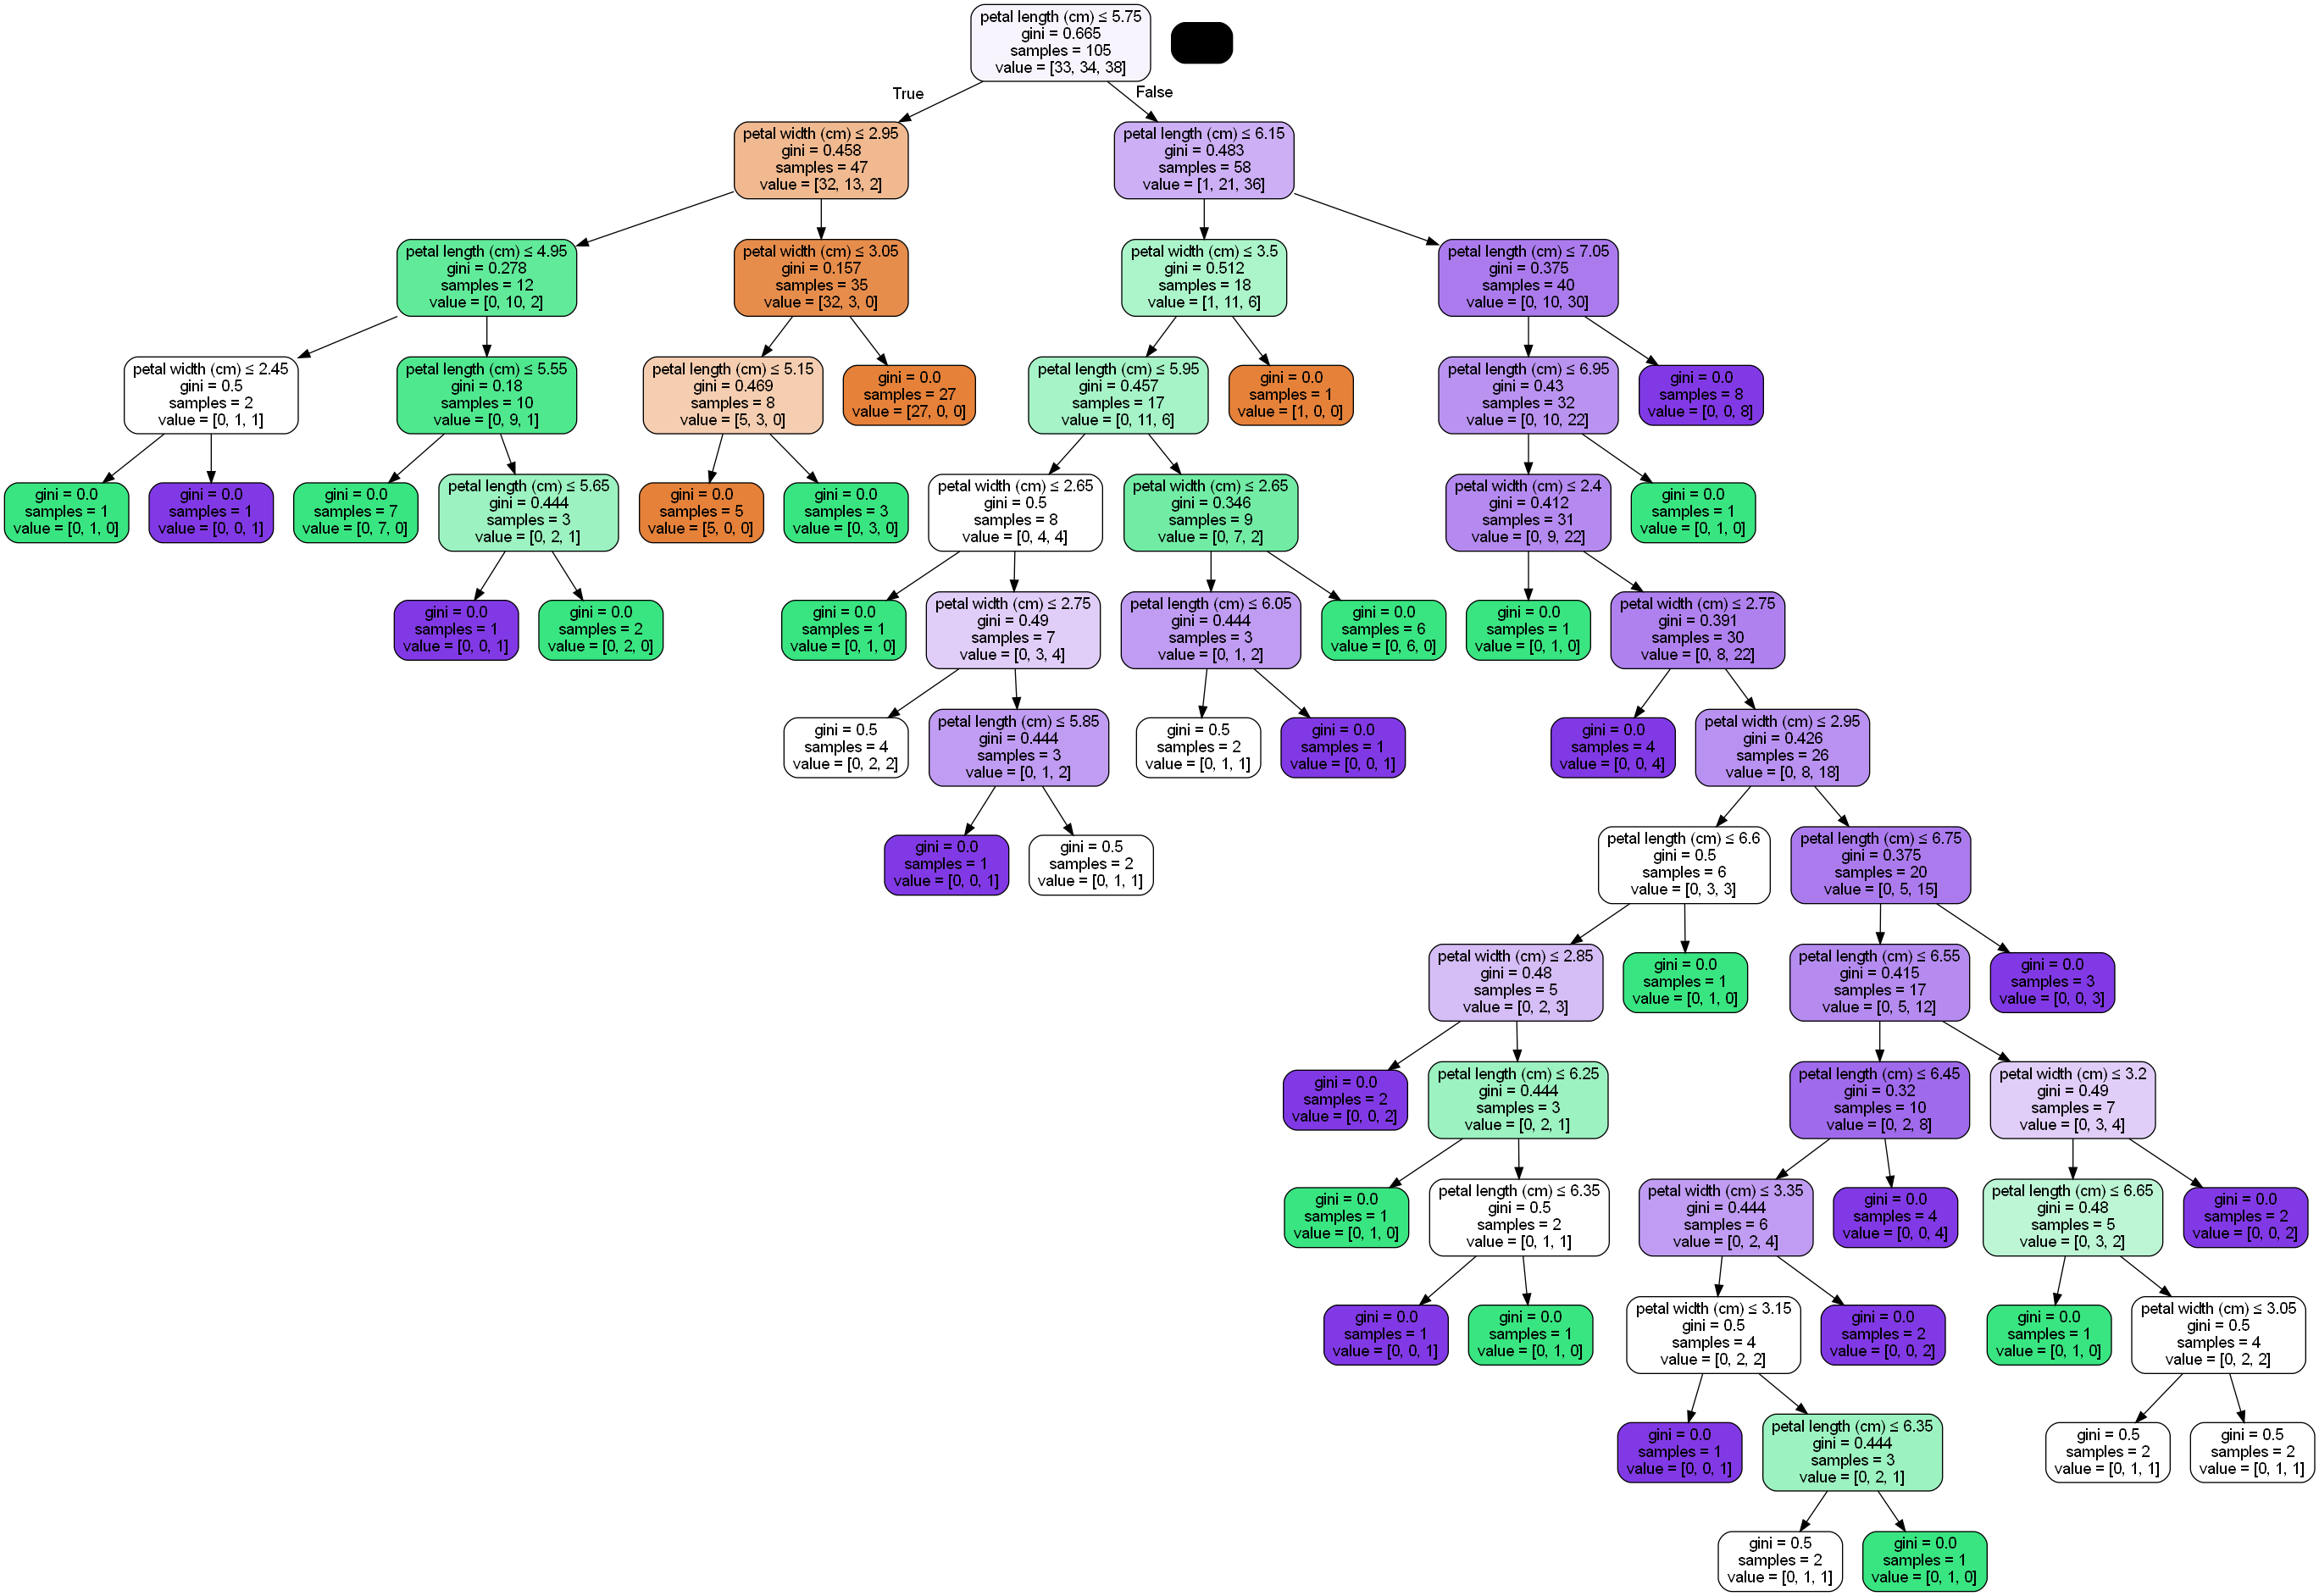

In [80]:
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree2, out_file=dot_data, feature_names=['petal length (cm)',
 'petal width (cm)'],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Training the Random Forest Model

In [82]:
rfc3 = RandomForestClassifier(n_estimators=10)

In [83]:
rfc3.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

## Prediction and Evaluation

In [85]:
predictions = rfc3.predict(X_test)

In [86]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.81      0.90        16
           2       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



In [87]:
print(confusion_matrix(y_test,predictions))

[[17  0  0]
 [ 0 13  3]
 [ 0  0 12]]


In [88]:
rfc3.score(X_test,y_test)

0.9333333333333333